#  <font color='red'> Minimum distance classifier </font> 



In [40]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

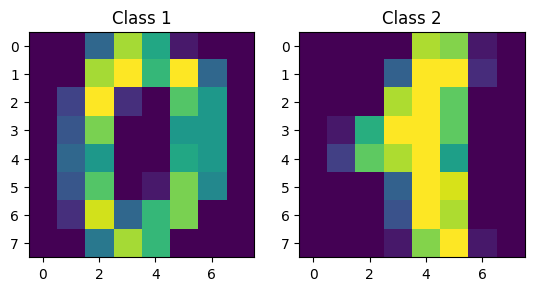

In [41]:
mnist = load_digits(n_class=10)
#print(mnist.keys())


# Change the line below to set the classes

# Try first with zeros and ones
# Change later to 2 and 3

zeros = (mnist.target==0)
ones = (mnist.target==1)

class1_images = mnist.images[zeros]
class2_images = mnist.images[ones]
fig,ax = plt.subplots(1,2)
s=ax[0].imshow(class1_images[0])
s=ax[0].set_title('Class 1')
s=ax[1].imshow(class2_images[1])
s=ax[1].set_title('Class 2')


## Compute the means of the classes and the std of the demeaned images

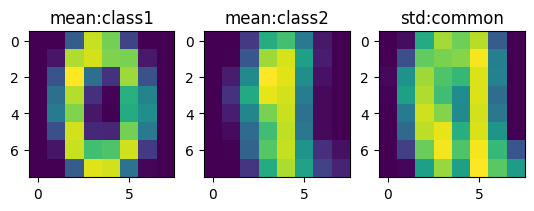

In [123]:
# Compute the means
mu1 = np.mean(class1_images,axis=0)
mu2 = np.mean(class2_images,axis=0)

# Create mean subtracted images
class1_demeaned = class1_images - mu1[None,]
class2_demeaned = class2_images - mu2[None,]

# Compute the combined covariance matrix, assuming it to be diagonal

class_combined_demeaned = np.concatenate((class1_demeaned,class2_demeaned),axis=0)
std = np.std(class_combined_demeaned,axis=0)

fig,ax = plt.subplots(1,3)
s=ax[0].imshow(mu1)
s=ax[0].set_title('mean:class1')
s=ax[1].imshow(mu2)
s=ax[1].set_title('mean:class2')

s=ax[2].imshow(std)
s=ax[2].set_title('std:common')

x = np.concatenate((class1_images,class2_images),axis=0)
class1_labels = np.full(x.shape[0], 2)
class1_labels[0:class1_images.shape[0]]=0
label1 = class1_labels[0:class1_images.shape[0]]
class1_labels[class1_images.shape[0]:]=1
label2 = class1_labels[class1_images.shape[0]:]

## Evaluate the discriminant, assuming $\Sigma_1=\Sigma_2 = \mathbf I$


$$y(\mathbf x) = \underbrace{(\mu_2-\mu_1)^T}_{\mathbf w^T} (\mathbf x-\frac{\mu_1+\mu_2}{2})$$

which simplifies to 

$$y(\mathbf x) = \underbrace{(\mu_2-\mu_1)^T}_{\mathbf w^T} ~\mathbf x- \underbrace{\mathbf w^T\left(\frac{\mu_1+\mu_2}{2}\right)}_{w_0}$$


class1 misclassifications =  1
class2 misclassifications =  1
Total misclassifications =  2


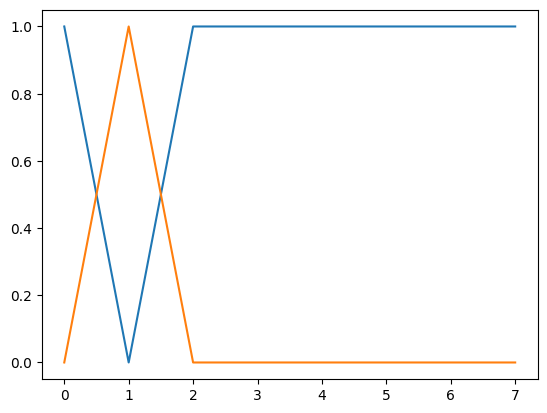

In [157]:
# Your code here
cov = np.eye(class_combined_demeaned.shape[1]) # Single row covariance matrix
cov_matrix_inv = np.linalg.inv(cov)
# Calculate Mahalanobis distance (Euclidean distance in this case)
mahalanobis_class1 = np.linalg.norm(x - mu1[None, :], axis=1)
mahalanobis_class2 = np.linalg.norm(x - mu2[None, :], axis=1)

mahalanobis_class1 = np.sqrt(cov_matrix_inv @ mahalanobis_class1[1])
mahalanobis_class2 = np.sqrt(cov_matrix_inv @ mahalanobis_class2[1])

# change the line below
class1_estimate = np.less(mahalanobis_class1, mahalanobis_class2)
class2_estimate = np.less(mahalanobis_class2 , mahalanobis_class1)

# shape data for print
#class1_labels_reshaped = class1_labels.reshape(8,360)

plt.plot(class1_estimate)
plt.plot(class2_estimate)
class1 = class1_estimate.reshape(-1,1)
label1 = label1.reshape(-1,1)
label1 = label1.reshape(-1,1)
misclass1 = np.sum(class1[0] != label1[0])
misclass2 = np.sum(class2_estimate[0] != label2[0])

print("class1 misclassifications = ",misclass1)
print("class2 misclassifications = ",misclass2)
print('Total misclassifications = ', misclass1+misclass2)

## Compute mean image and template assuming $\Sigma = {\rm diag}(\sigma)$

# misclassifications =  1
# misclassifications =  1


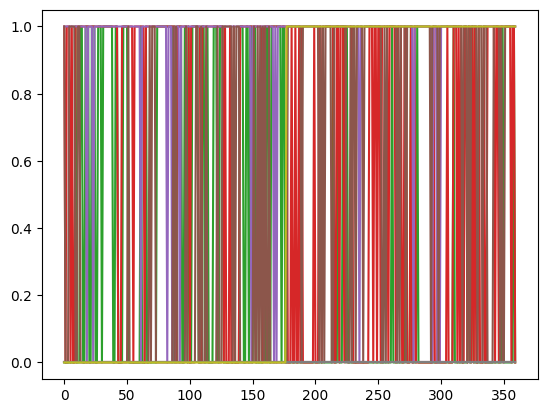

In [ ]:
# Mean image - average across all images in both classes
mu = np.mean(x, axis=0)

# Standard deviation across all images
sigma = np.std(x,axis=0)

# Template sum of mean and standard deviation = threshold
template = (mu + sigma)

# change the line below
class1_estimate = x.mean(axis=1) > template.mean()



#class1_labels_reshaped = class1_labels.reshape(45,8)

plt.plot(class1_estimate)
plt.plot(class1_labels)


print("# misclassifications = ",np.sum((class1_estimate.std != class1_labels.std)))
print("# misclassifications = ",np.sum((class2_estimate.std != class1_labels.std)))
